# LSTM time series forecasting

In [20]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
data = pd.read_csv("/content/MicrosoftStock.csv")
data.head()

,index,date,open,high,low,close,volume,Name
0,390198,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,390199,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,390200,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,390201,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,390202,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [3]:
data.shape

(1259, 8)

In [4]:
data.columns.tolist()

['index', 'date', 'open', 'high', 'low', 'close', 'volume', 'Name']

In [5]:
data.isnull().sum()

,0
index,0
date,0
open,0
high,0
low,0
close,0
volume,0
Name,0


In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1259 non-null   int64  
 1   date    1259 non-null   object 
 2   open    1259 non-null   float64
 3   high    1259 non-null   float64
 4   low     1259 non-null   float64
 5   close   1259 non-null   float64
 6   volume  1259 non-null   int64  
 7   Name    1259 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 78.8+ KB


In [8]:
data.describe()

,index,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,390827.000000,51.026394,51.436007,50.630397,51.063081,3.386946e+07
std,363.586303,14.859387,14.930144,14.774630,14.852117,1.958979e+07
min,390198.000000,27.350000,27.600000,27.230000,27.370000,7.425603e+06
25%,390512.500000,40.305000,40.637500,39.870000,40.310000,2.254879e+07
50%,390827.000000,47.440000,47.810000,47.005000,47.520000,2.938758e+07
75%,391141.500000,59.955000,60.435000,59.275000,59.730000,3.842024e+07
max,391456.000000,95.140000,96.070000,93.720000,95.010000,2.483542e+08


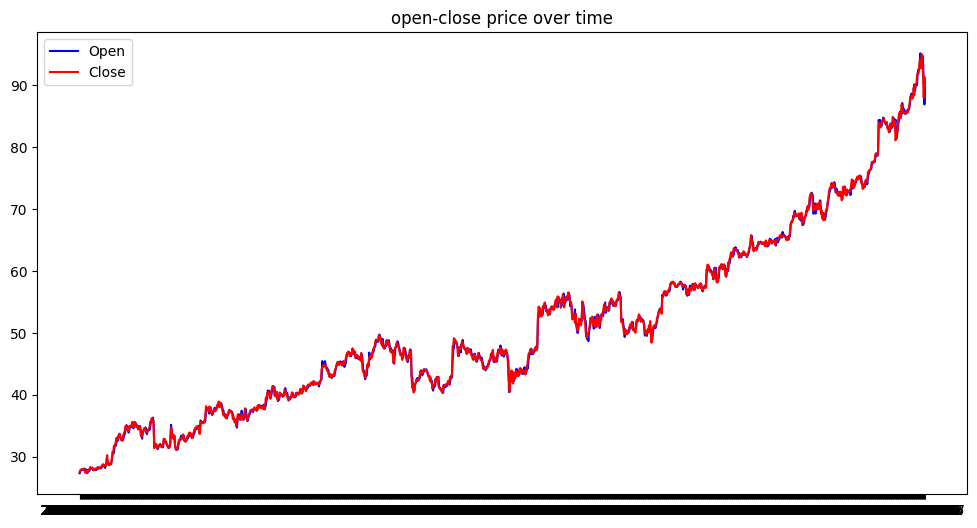

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(data["date"], data["open"], label="Open", color="blue")
plt.plot(data["date"], data["close"], label="Close", color="red")
plt.title("open-close price over time")
plt.legend()
plt.show()

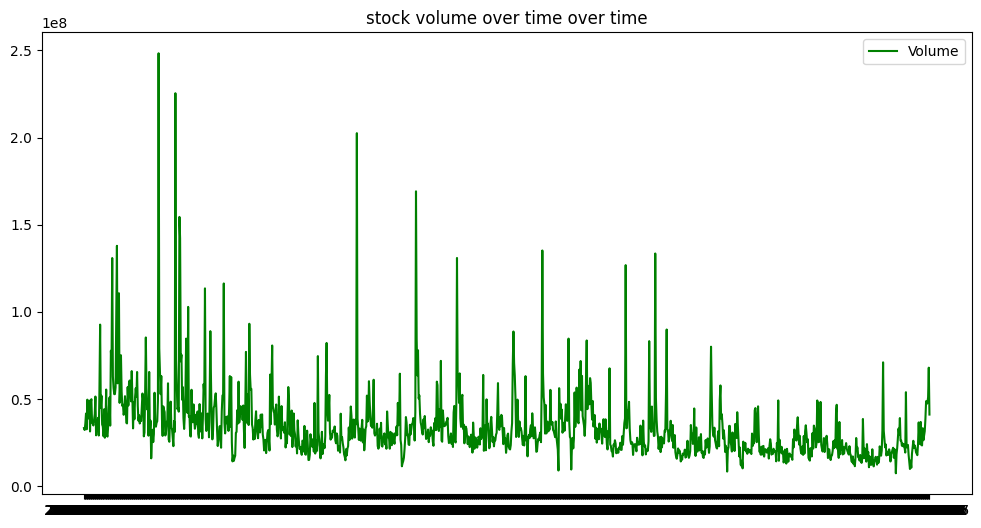

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(data["date"], data["volume"], label="Volume", color="green")
plt.title("stock volume over time over time")
plt.legend()
plt.show()

In [11]:
data.head()

,index,date,open,high,low,close,volume,Name
0,390198,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,390199,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,390200,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,390201,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,390202,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


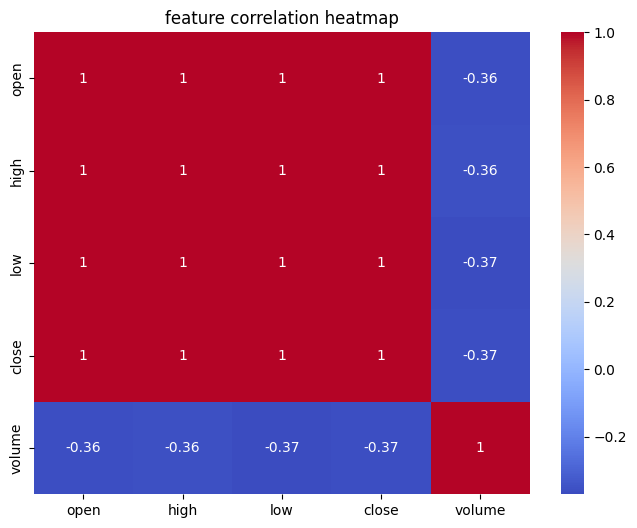

In [14]:
numeric_data = data.select_dtypes(include=['number'])
numeric_data = numeric_data.drop("index", axis=1)
corr = numeric_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot = True,
    cmap = "coolwarm"
)
plt.title("feature correlation heatmap")
plt.show()

In [18]:
data["date"] = pd.to_datetime(data["date"])
data["date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1259 entries, 0 to 1258
Series name: date
Non-Null Count  Dtype         
--------------  -----         
1259 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 10.0 KB


In [21]:
prediction = data.loc[
    (data["date"] > datetime(2013, 1, 1)) &
    (data["date"] < datetime(2018, 1, 1))
]
prediction.shape

(1233, 8)

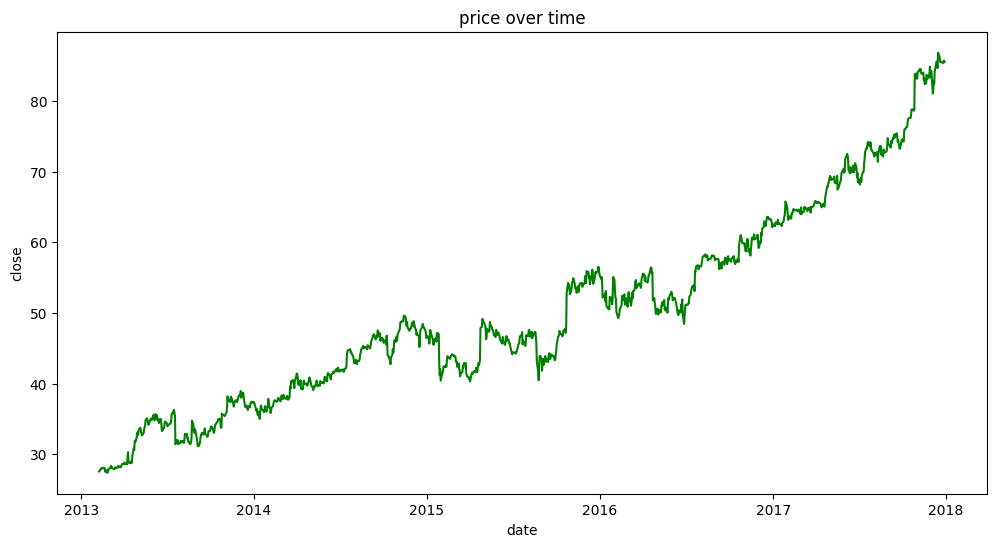

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(prediction["date"], prediction["close"], color="green")
plt.xlabel("date")
plt.ylabel("close")
plt.title("price over time")
plt.show()

## modelling and training

In [26]:
stock_close = data["close"]
dataset = stock_close.values
dataset

array([27.55, 27.86, 27.88, ..., 88.  , 91.33, 89.61])

In [27]:
training_len = int(np.ceil(len(dataset) * 0.95))
training_len

1197

In [28]:
scaler = StandardScaler()
scaled_ds = scaler.fit_transform(dataset)
scaled_ds

ValueError: Expected 2D array, got 1D array instead:
array=[27.55 27.86 27.88 ... 88.   91.33 89.61].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.